## How much do Data Analysts earn based on their skills?

### Methodology

1. **Check Median Salaries**: Calculate the median salary for the top 6 data jobs.
2. **Analyze Skills**: Find the median salary for each skill specific to Data Analysts.
3. **Visualize**: Create charts showing the highest-paying and most demanded skills.

### Import Libraries and Data

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Salary Distribution by Job Title
Filter our data to only include salary values from the Netherlands.

In [3]:
# filter for the job titles and country
df_NL = df[(df['job_country'] == 'Netherlands')].dropna(subset=['salary_year_avg'])

#Create a list of the main job_titles in our dataset and filter our dataframe to only contain these job titles.

job_titles = df_NL['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_NL_top6 = df_NL[df_NL['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_NL_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Business Analyst']

### Plot Salary Distributions

Create a box plot to show the salary distributions for the top 6 job titles.

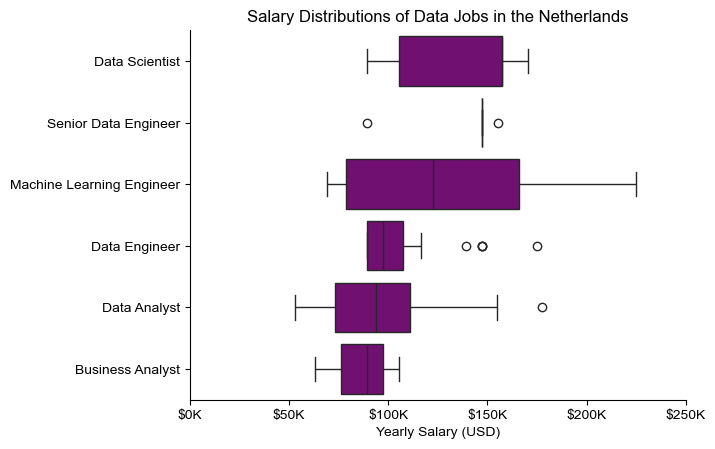

In [4]:
sns.boxplot(data=df_NL_top6, x='salary_year_avg', y='job_title_short', order=job_order, color='purple')
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in the Netherlands')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 250000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

### Investigate Median Salary vs. Skill for Data Analysts

1. **Filter Data**: Select rows where the job title is 'Data Analyst' and the country is 'United States' to create a new DataFrame, `df_DA_US`.
2. **Clean Data**: Remove rows with missing values in the `salary_year_avg` column.
3. **Expand Skills**: Use the `explode` method on the `job_skills` column to create a separate row for each skill.
4. **Show Data**: Display the first five rows of the `salary_year_avg` and `job_skills` columns.

In [5]:
# Only get data analyst jobs in the Netherlands
df_DA_NL = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Netherlands')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_NL = df_DA_NL.dropna(subset=['salary_year_avg'])

df_DA_NL = df_DA_NL.explode('job_skills')

df_DA_NL[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
13350,53014.0,sql
13350,53014.0,python
19026,155000.0,sap
134635,98500.0,sql
134635,98500.0,c#


### Find Highest-Paid and Most Demanded Skills

1. **Identify Top Skills**: Calculate the median salary for each skill listed in `df_DA_US` to find the top ten highest-paying skills for Data Analysts.
2. **Group and Sort**: Group the data by skills, compute the median salary, and sort these values in descending order.
3. **Select Top 10**: Choose the top 10 highest-paying skills.
4. **Format Data**: Create a new DataFrame, `df_DA_top_pay`, with the results, reset the index, and rename the salary column to `median_salary`.

In [6]:
df_DA_top_pay = df_DA_NL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
azure,1,177283.0
nosql,1,177283.0
aws,1,177283.0
hadoop,2,144242.5
spark,2,122141.5
airflow,1,111202.0
vba,1,111202.0
pyspark,2,111188.5
looker,3,111175.0


### Calculate Skill Counts and Median Salaries

1. **Group Data**: Group the data by `job_skills`.
2. **Aggregate**: Calculate the count and median salary for each skill.
3. **Sort by Count**: Order the results by skill count, from highest to lowest.
4. **Sort by Salary**: Within the top counts, reorder by median salary, from highest to lowest.

In [7]:
df_DA_skills = df_DA_NL.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
tableau,3,111175.0
go,3,111175.0
looker,3,111175.0
sap,3,111175.0
outlook,2,108087.5
r,7,98500.0
sql,11,89204.0
excel,7,89204.0
python,11,89100.0


### Create Bar Charts

1. **Highest-Paid Skills**: Create a horizontal bar chart showing the skills with the highest median salaries.
2. **Most In-Demand Skills**: Create a horizontal bar chart showing the skills that are most frequently requested.

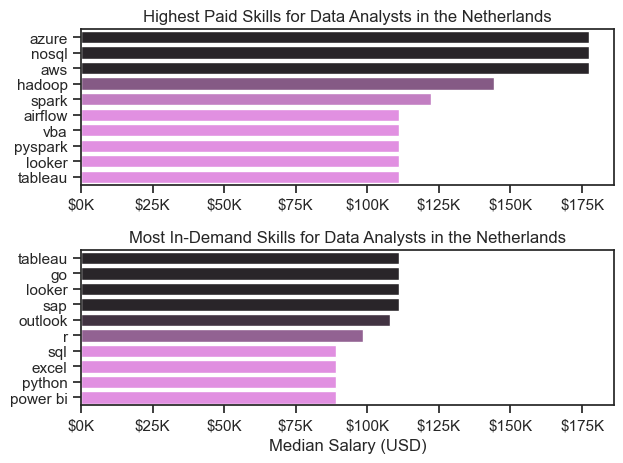

In [9]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:violet_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in the Netherlands')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='dark:violet_r')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in the Netherlands')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()